# Table of Contents
 <p>

# Topic modeling and sentiment analysis

In this practice we will perform topic modeling and sentiment analysis on two datasets.

# Activity 1: Load the kaggle voted dataset and perform following tasks 

* Focus on the "Description" column and preprocess if required
* Fit an LDA model with 10 topics on the "Description" column 
    * While creating TF matrix ignore terms that have a document frequency strictly higher than 100
* Print top-5 words per topic

### Load data file

In [1]:
# load necessary packages
import json
import pandas as pd
import re

In [4]:
filepath = "/dsa/data/DSA-8410/voted-kaggle-dataset.csv"

## Create the dataframe

df = pd.read_csv(filepath, encoding = 'utf-8')
df.head()

,Title,Subtitle,Owner,Votes,Versions,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1241,"Version 2,2016-11-05|Version 1,2016-11-03",crime\nfinance,CSV,144 MB,ODbL,"442,136 views","53,128 downloads","1,782 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1046,"Version 10,2016-10-24|Version 9,2016-10-24|Ver...",association football\neurope,SQLite,299 MB,ODbL,"396,214 views","46,367 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1024,"Version 2,2017-09-28",film,CSV,44 MB,Other,"446,255 views","62,002 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...
3,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,789,"Version 2,2017-07-19|Version 1,2016-12-08",crime\nterrorism\ninternational relations,CSV,144 MB,Other,"187,877 views","26,309 downloads",608 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr..."
4,Bitcoin Historical Data,Bitcoin data at 1-min intervals from select ex...,Zielak,618,"Version 11,2018-01-11|Version 10,2017-11-17|Ve...",history\nfinance,CSV,119 MB,CC4,"146,734 views","16,868 downloads",68 kernels,13 topics,https://www.kaggle.com/mczielinski/bitcoin-his...,Context\nBitcoin is the longest running and mo...


### Create a TF matrix

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocationa


In [5]:
desc = df['Description'].dropna()
print(desc)

0       The datasets contains transactions made by cre...
1       The ultimate Soccer database for data analysis...
2       Background\nWhat can we say about the success ...
3       Context\nInformation on more than 170,000 Terr...
4       Context\nBitcoin is the longest running and mo...
                              ...                        
2145    Context\nFortnite: Battle Royale has over 20 m...
2146    Context\nThis dataset provides the nationaliti...
2147    lem.json\nThis file contains lementized englis...
2148    Context\nThis data set contains weather data f...
2149    Context\nBirths in U.S during 1994 to 2003.\nC...
Name: Description, Length: 2145, dtype: object


In [6]:
docs = desc.values
countVectorizer = CountVectorizer(stop_words = 'english', max_df=100)
termFrequency = countVectorizer.fit_transform(docs)
featureNames = countVectorizer.get_feature_names()

### Fit an LDA model

In [7]:
lda = LatentDirichletAllocation(n_components = 10)
lda.fit(termFrequency)

LatentDirichletAllocation()

### Print top 10 words per topic

In [8]:
for idx, topic in enumerate(lda.components_):
    print("Topic ", idx, " ".join(featureNames[i] for i in topic.argsort()[:-10 - 1:-1]))

Topic  0 reviews crime police review dry product reported ratings car properties
Topic  1 player station weather shot frequency ice goals attempts nominal shots
Topic  2 player integer players match strongly matches interested games season teams
Topic  3 pokemon tweets wine air tweet police percent float twitter songs
Topic  4 numeric post york vectors languages job street wouldn largest food
Topic  5 survey census income energy economic education bureau estimates bank housing
Topic  6 txt traffic speed temperature comments survey job weather road street
Topic  7 trained networks school numeric uci residual education student recognition deep
Topic  8 en race horse score request scores la les targeted mass
Topic  9 stock market prices child low volume dub lub death map


# Activity 2: Load the Twitter US Airline Sentiment data and perform the following task

* Preprocess the text column with the removal of all the mentions 
* Identify sentiment (pos, neg, neu) for each of the tweets using the standard rule mentioned in the lab
* Print the classification report

### Load data file

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

In [10]:
filepath = "/dsa/data/DSA-8410/Twitter-US-Airline-Sentiment/Tweets.csv"

df_all = pd.read_csv(filepath)
df_all.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Preprocess the tweets

In [11]:
tweets = [re.sub(r'@(\w+)', ' ', t) for t in df_all['text'].values]

### Identify polarity for each tweet 

In [12]:
analyzer = SentimentIntensityAnalyzer()
tweets_sentiment = [analyzer.polarity_scores(t) for t in tweets]

df = pd.DataFrame(tweets_sentiment)
df['tweet'] = tweets
df.head()

,neg,neu,pos,compound,tweet
0,0.000,1.000,0.0,0.0000,What said.
1,0.000,1.000,0.0,0.0000,plus you've added commercials to the experie...
2,0.000,1.000,0.0,0.0000,I didn't today... Must mean I need to take a...
3,0.259,0.741,0.0,-0.5984,"it's really aggressive to blast obnoxious ""e..."
4,0.351,0.649,0.0,-0.5829,and it's a really big bad thing about it


In [13]:
df.describe()

,neg,neu,pos,compound
count,14640.000000,14640.000000,14640.000000,14640.000000
mean,0.089417,0.777355,0.133227,0.052397
std,0.120441,0.187613,0.181640,0.456590
min,0.000000,0.000000,0.000000,-0.966800
25%,0.000000,0.672000,0.000000,-0.296000
50%,0.000000,0.797000,0.072000,0.000000
75%,0.156000,0.913000,0.210000,0.437400
max,1.000000,1.000000,1.000000,0.976000


### Perform a rule-base classification

In [14]:
df['sentiment'] = 'NEU'
df.loc[df['compound'] > 0.05, 'sentiment'] = 'POS'
df.loc[df['compound'] < -0.05, 'sentiment'] = "NEG"

df.head()

,neg,neu,pos,compound,tweet,sentiment
0,0.000,1.000,0.0,0.0000,What said.,NEU
1,0.000,1.000,0.0,0.0000,plus you've added commercials to the experie...,NEU
2,0.000,1.000,0.0,0.0000,I didn't today... Must mean I need to take a...,NEU
3,0.259,0.741,0.0,-0.5984,"it's really aggressive to blast obnoxious ""e...",NEG
4,0.351,0.649,0.0,-0.5829,and it's a really big bad thing about it,NEG


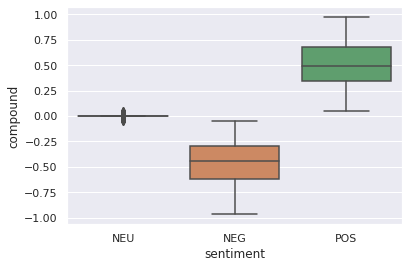

In [16]:
import seaborn as sns
sns.set()
sns.boxplot(x = "sentiment", y = "compound", data = df);

### Report classification metrices

In [17]:
y_true = df_all['airline_sentiment'].map({'neutral': 'NEU', 'positive': 'POS', 'negative': 'NEG'})
y_pred = df['sentiment']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         NEG       0.90      0.50      0.64      9178
         NEU       0.38      0.43      0.40      3099
         POS       0.34      0.87      0.49      2363

    accuracy                           0.54     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.54      0.57     14640

